In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [2]:
start_day = datetime.datetime(2002,6,13)
end_day = datetime.datetime(2022,6,13)
dj1 = web.get_data_stooq('^DJI',start_day,end_day)

In [969]:
len(dj1)

5036

In [3]:
dj1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5036 entries, 2022-06-13 to 2002-06-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5036 non-null   float64
 1   High    5036 non-null   float64
 2   Low     5036 non-null   float64
 3   Close   5036 non-null   float64
 4   Volume  5036 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.1 KB


In [4]:
dj1.sort_index(ascending=True,inplace=True)

In [5]:
dj1['Close_1'] = dj1['Close'].shift(-1)

In [6]:
dj1

,Open,High,Low,Close,Volume,Close_1
Date,,,,,,
2002-06-13,9612.87,9625.40,9491.86,9502.80,227552955,9474.21
2002-06-14,9498.92,9498.92,9260.99,9474.21,287001167,9687.42
2002-06-17,9476.50,9687.77,9476.50,9687.42,247554505,9706.12
2002-06-18,9684.52,9721.75,9636.96,9706.12,212707042,9561.57
2002-06-19,9702.00,9733.39,9542.74,9561.57,248083566,9431.77
...,...,...,...,...,...,...
2022-06-07,32783.03,33207.45,32641.85,33180.14,327463783,32910.90
2022-06-08,33087.07,33156.50,32824.37,32910.90,314420559,32272.79
2022-06-09,32828.62,32956.73,32267.78,32272.79,331546530,31392.79


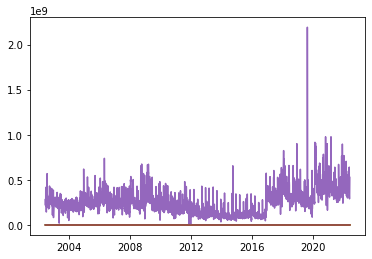

In [7]:
plt.plot(dj1)

In [8]:
from sklearn.feature_selection import mutual_info_regression

Define time lags for variables

In [10]:
d = range(0,31)

In [11]:
high_lag = pd.DataFrame(dj1['High'])
for i in d[1:]:
    column = 'high_lag_'+str(i)
    high_lag[column] = dj1['High'].shift(i)
    
open_lag = pd.DataFrame(dj1['Open'])
for i in d[1:]:
    column = 'open_lag_'+str(i)
    open_lag[column] = dj1['Open'].shift(i)
    
low_lag = pd.DataFrame(dj1['Low'])
for i in d[1:]:
    column = 'low_lag_'+str(i)
    low_lag[column] = dj1['Low'].shift(i)
    
vol_lag = pd.DataFrame(dj1['Volume'])
for i in range(1,31):
    column = 'vol_lag_'+str(i)
    vol_lag[column] = dj1['Volume'].shift(i)

Combine all features and targets into a DataFrame

In [12]:
F = pd.concat([high_lag,open_lag,low_lag,vol_lag,dj1['Close_1']],axis=1)
F

,High,high_lag_1,high_lag_2,high_lag_3,high_lag_4,high_lag_5,high_lag_6,high_lag_7,high_lag_8,high_lag_9,...,vol_lag_22,vol_lag_23,vol_lag_24,vol_lag_25,vol_lag_26,vol_lag_27,vol_lag_28,vol_lag_29,vol_lag_30,Close_1
Date,,,,,,,,,,,,,,,,,,,,,
2002-06-13,9625.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9474.21
2002-06-14,9498.92,9625.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9687.42
2002-06-17,9687.77,9498.92,9625.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9706.12
2002-06-18,9721.75,9687.77,9498.92,9625.40,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9561.57
2002-06-19,9733.39,9721.75,9687.77,9498.92,9625.40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9431.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-07,33207.45,33235.37,33135.61,33248.61,33272.34,33240.22,33213.62,32774.14,32254.44,32014.86,...,507031169.0,479098068.0,425820730.0,516891401.0,552952031.0,510766945.0,507356836.0,456006869.0,477810060.0,32910.90
2022-06-08,33156.50,33207.45,33235.37,33135.61,33248.61,33272.34,33240.22,33213.62,32774.14,32254.44,...,457941820.0,507031169.0,479098068.0,425820730.0,516891401.0,552952031.0,510766945.0,507356836.0,456006869.0,32272.79
2022-06-09,32956.73,33156.50,33207.45,33235.37,33135.61,33248.61,33272.34,33240.22,33213.62,32774.14,...,535207901.0,457941820.0,507031169.0,479098068.0,425820730.0,516891401.0,552952031.0,510766945.0,507356836.0,31392.79


In [13]:
import mrmr

In [16]:
from sklearn.datasets import make_regression

In [17]:
from mrmr import mrmr_regression
selected_features = mrmr_regression(X=F.iloc[30:-1,:125], y=F['Close_1'][30:-1], K=10)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.83it/s]


In [18]:
selected_features

['Low',
 'High',
 'Open',
 'low_lag_1',
 'high_lag_1',
 'open_lag_1',
 'low_lag_2',
 'high_lag_2',
 'open_lag_2',
 'low_lag_3']

In [41]:
X = np.array(F.iloc[30:-1,:124])
Y = np.array(F['Close_1'][30:-1]).reshape((5005,))

In [66]:
from sklearn.feature_selection import mutual_info_regression

In [73]:
X = np.array(F.iloc[:-1,0]).reshape((-1,1))
Y = np.array(F['Close_1'][:-1]).reshape((-1,1))

mi = mutual_info_regression(X,Y)
mi

array([3.45191133])

In [1173]:
from mlxtend.feature_selection import SequentialFeatureSelector

Accumulative Mutual information

In [1087]:
y_test = np.array(dj1['Close_1'][1:-1])
x_test = np.array(high_lag.iloc[1:-1,:2]).reshape((-1,2))

In [1088]:
MIR(x_test,y_test)

array([3.45163719, 3.20322228])

In [1089]:
mi_scores_high[:2]

[array([3.45153237]), array([3.20322508])]

In [967]:
len(dj1['Close_1'][1:-1])

5034

In [972]:
mi_scores_high = []
for i in range(0,31):
    mi_score = 0.0
    if i == 0:
        y_test = np.array(dj1['Close_1'][1:-1])
        x_test = np.array(high_lag['High'][1:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    else:
        y_test = np.array(dj1['Close_1'][i:-1])
        x_test = np.array(high_lag['high_lag_'+str(i)][i:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    mi_scores_high.append(mi_score)

mi_scores_open = []
for i in range(0,31):
    mi_score = 0.0
    if i == 0:
        y_test = np.array(dj1['Close_1'][1:-1])
        x_test = np.array(open_lag['Open'][1:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    else:
        y_test = np.array(dj1['Close_1'][i:-1])
        x_test = np.array(open_lag['open_lag_'+str(i)][i:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    mi_scores_open.append(mi_score)
                 
mi_scores_low = []
for i in range(0,31):
    mi_score = 0.0
    if i == 0:
        y_test = np.array(dj1['Close_1'][1:-1])
        x_test = np.array(low_lag['Low'][1:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    else:
        y_test = np.array(dj1['Close_1'][i:-1])
        x_test = np.array(low_lag['low_lag_'+str(i)][i:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    mi_scores_low.append(mi_score)    

mi_scores_vol = []
for i in range(0,31):
    mi_score = 0.0
    if i == 0:
        y_test = np.array(dj1['Close_1'][1:-1])
        x_test = np.array(vol_lag['Volume'][1:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    else:
        y_test = np.array(dj1['Close_1'][i:-1])
        x_test = np.array(vol_lag['vol_lag_'+str(i)][i:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    mi_scores_vol.append(mi_score)

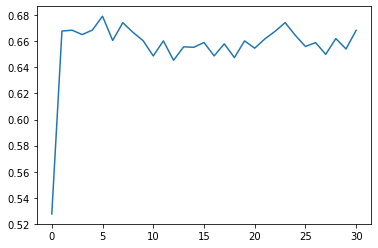

In [1092]:
plt.plot(range(0,31),mi_scores_vol,label='Volume')

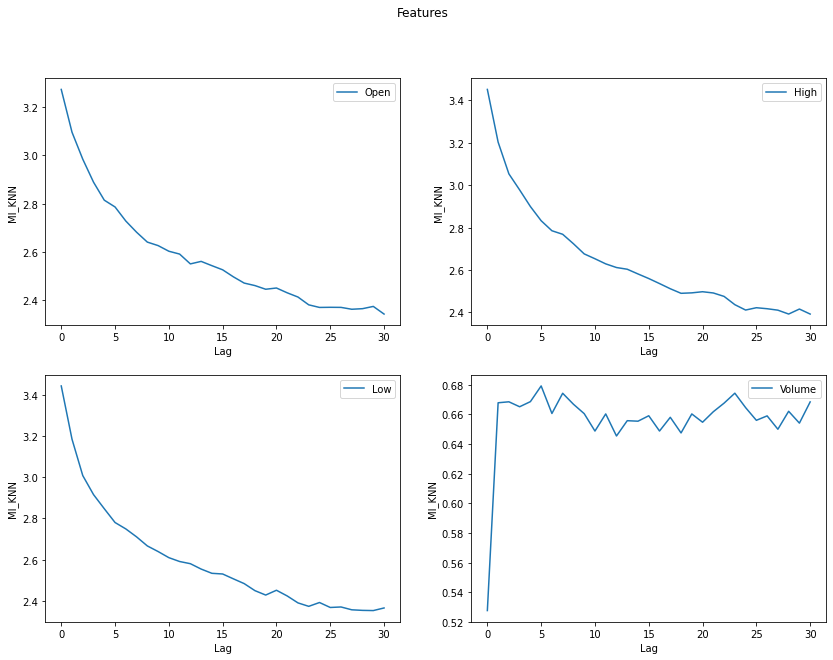

In [1128]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.plot(range(0,31),mi_scores_open,label='Open')
plt.ylabel('MI_KNN')
plt.xlabel('Lag')
plt.legend()
plt.subplot(2,2,2)
plt.plot(range(0,31),mi_scores_high,label='High')
plt.ylabel('MI_KNN')
plt.xlabel('Lag')
plt.legend()
plt.subplot(2,2,3)
plt.plot(range(0,31),mi_scores_low,label='Low')
plt.ylabel('MI_KNN')
plt.xlabel('Lag')
plt.legend()
plt.subplot(2,2,4)
plt.plot(range(0,31),mi_scores_vol,label='Volume')
plt.ylabel('MI_KNN')
plt.xlabel('Lag')
plt.legend()

plt.suptitle('Features')
plt.show()

In [975]:
print('High ',mi_scores_high.index(max(mi_scores_high)))    
print('Open ',mi_scores_open.index(max(mi_scores_open)))    
print('Low ',mi_scores_low.index(max(mi_scores_low)))    
print('Volume ',mi_scores_vol.index(max(mi_scores_vol)))    

High  0
Open  0
Low  0
Volume  5


In [155]:
import math
from collections import Counter

In [270]:
x = open_lag['open_lag_2'].dropna()
y = dj1['Close'][2:]

In [255]:
from sklearn import metrics

In [258]:
from scipy.special import digamma,psi
from scipy import ndimage
from scipy.linalg import det
from sklearn.neighbors import NearestNeighbors

In [276]:
from sklearn.feature_selection import mutual_info_regression as MIR

using volume(t)...(t-5)+high+low+open

In [1129]:
dj5 = new_dj1 = pd.DataFrame({
    'High(t)':dj1['High'],
    'Low(t)':dj1['Low'],
    'Open(t)':dj1['Open'],
    'Volume(t-5)':vol_lag['vol_lag_5'],
    'Volume(t-4)':vol_lag['vol_lag_4'],
    'Volume(t-3)':vol_lag['vol_lag_3'],
    'Volume(t-2)':vol_lag['vol_lag_2'],
    'Volume(t-1)':vol_lag['vol_lag_1'],
    'Volume(t)':dj1['Volume'],
    'Close(t+1)':dj1['Close_1'],
    'Close(t)':dj1['Close']
})

In [1130]:
dj5

,High(t),Low(t),Open(t),Volume(t-5),Volume(t-4),Volume(t-3),Volume(t-2),Volume(t-1),Volume(t),Close(t+1),Close(t)
Date,,,,,,,,,,,
2002-06-13,9625.40,9491.86,9612.87,NaN,NaN,NaN,NaN,NaN,227552955,9474.21,9502.80
2002-06-14,9498.92,9260.99,9498.92,NaN,NaN,NaN,NaN,227552955.0,287001167,9687.42,9474.21
2002-06-17,9687.77,9476.50,9476.50,NaN,NaN,NaN,227552955.0,287001167.0,247554505,9706.12,9687.42
2002-06-18,9721.75,9636.96,9684.52,NaN,NaN,227552955.0,287001167.0,247554505.0,212707042,9561.57,9706.12
2002-06-19,9733.39,9542.74,9702.00,NaN,227552955.0,287001167.0,247554505.0,212707042.0,248083566,9431.77,9561.57
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-07,33207.45,32641.85,32783.03,640857432.0,344779544.0,350437139.0,327416082.0,289294618.0,327463783,32910.90,33180.14
2022-06-08,33156.50,32824.37,33087.07,344779544.0,350437139.0,327416082.0,289294618.0,327463783.0,314420559,32272.79,32910.90
2022-06-09,32956.73,32267.78,32828.62,350437139.0,327416082.0,289294618.0,327463783.0,314420559.0,331546530,31392.79,32272.79


to predict close,we use high(t) ,low(t),open_price(t),volume(t-5)

In [1135]:
dj5_copy = dj5.iloc[5:-1,:]
SCX = MinMaxScaler(feature_range=(0,1))
SCY = MinMaxScaler(feature_range=(0,1))
scl_X = SCX.fit_transform(dj5_copy.iloc[:,:9])
scl_Y = SCY.fit_transform(pd.DataFrame(dj5_copy['Close(t+1)']))

In [1137]:
x_5 = np.reshape(scl_X, (scl_X.shape[0], scl_X.shape[1], 1))
y_5 = scl_Y.reshape((-1,1))
test_len = int(len(x)*0.7)
X_train_5 = x_5[:test_len]
X_test_5 = x_5[test_len:]
y_train_5 = y_5[:test_len]
y_test_5 = y_5[test_len:]

In [1138]:
mi_5 = Sequential()
mi_5.add(LSTM(50,return_sequences = True))
# 添加 Dropout 隐藏层 防止过拟合
mi_5.add(Dropout(0.2))

# 添加 含有 30 个单元的 LSTM 网络(第二层)
mi_5.add(LSTM(30,return_sequences = True))
# 添加 Dropout 隐藏层 防止过拟合
mi_5.add(Dropout(0.2))

# 添加 含有 10 个单元的 LSTM 网络(第三层)
# 注意，最后一层没有 return_sequences = True ！！！
mi_5.add(LSTM(10))
# 添加 Dropout 隐藏层 防|止过拟合
mi_5.add(Dropout(0.2))

# 添加输出层网络以输出预测的股票收盘价格
mi_5.add(Dense(1))

In [1143]:
X_test_5.shape

(1509, 9, 1)

In [1139]:
mi_5.compile(optimizer='adam', loss='mean_squared_error')
mi_5.fit(X_train_5, y_train_5, batch_size=32, epochs=100)

Epoch 1/100
111/111 [==============================] - 11s 12ms/step - loss: 0.0065
Epoch 2/100
111/111 [==============================] - 1s 12ms/step - loss: 0.0016
Epoch 3/100
111/111 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 4/100
111/111 [==============================] - 1s 13ms/step - loss: 9.5218e-04
Epoch 5/100
111/111 [==============================] - 1s 13ms/step - loss: 8.4934e-04
Epoch 6/100
111/111 [==============================] - 1s 12ms/step - loss: 6.9084e-04
Epoch 7/100
111/111 [==============================] - 1s 12ms/step - loss: 5.8329e-04
Epoch 8/100
111/111 [==============================] - 1s 13ms/step - loss: 5.8190e-04
Epoch 9/100
111/111 [==============================] - 1s 12ms/step - loss: 4.1645e-04
Epoch 10/100
111/111 [==============================] - 1s 11ms/step - loss: 4.1649e-04
Epoch 11/100
111/111 [==============================] - 1s 12ms/step - loss: 3.8551e-04
Epoch 12/100
111/111 [==============================

In [1141]:
y_pred_5 = mi_5.predict(X_test_5)
mean_absolute_error(y_test_5, y_pred_5)

0.33249776321970453

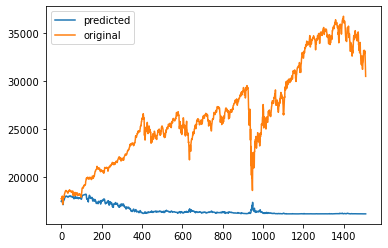

In [1152]:
plt.plot(SCY.inverse_transform(y_pred_5),label='predicted')
plt.plot(SCY.inverse_transform(y_test_5),label='original')
plt.legend()
plt.show()

In [983]:
new_dj1 = pd.DataFrame({
    'High(t)':dj1['High'],
    'Low(t)':dj1['Low'],
    'Open(t)':dj1['Open'],
    'Volume(t-5)':vol_lag['vol_lag_5'],
    'Volume(t)':dj1['Volume'],
    'Close(t+1)':dj1['Close_1'],
    'Close(t)':dj1['Close']
})

In [1091]:
new_dj1.corr()

,High(t),Low(t),Open(t),Volume(t-5),Volume(t),Close(t+1),Close(t)
High(t),1.000000,0.999794,0.999897,0.409010,0.411531,0.991495,0.999866
Low(t),0.999794,1.000000,0.999845,0.402746,0.402030,0.991109,0.999879
Open(t),0.999897,0.999845,1.000000,0.405768,0.407953,0.991283,0.999751
Volume(t-5),0.409010,0.402746,0.405768,1.000000,0.715281,0.457567,0.406095
Volume(t),0.411531,0.402030,0.407953,0.715281,1.000000,0.458063,0.406272
Close(t+1),0.991495,0.991109,0.991283,0.457567,0.458063,1.000000,0.991301
Close(t),0.999866,0.999879,0.999751,0.406095,0.406272,0.991301,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

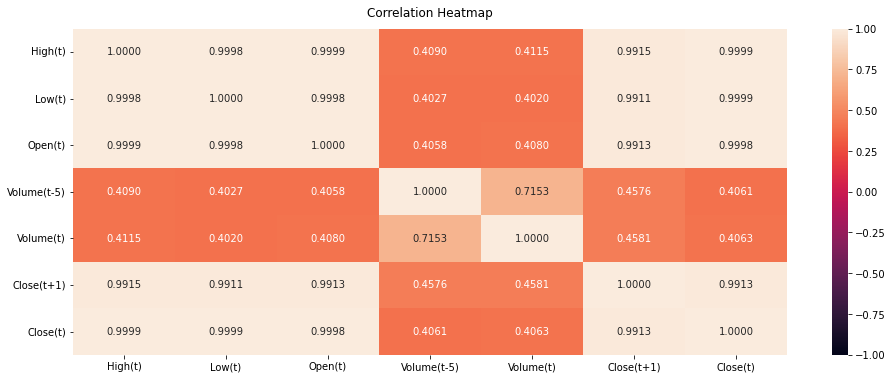

In [1103]:
import seaborn as sns
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(new_dj1.corr(), vmin=-1, vmax=1,fmt=".4f", annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [984]:
new_dj1

,High(t),Low(t),Open(t),Volume(t-5),Volume(t),Close(t+1),Close(t)
Date,,,,,,,
2002-06-13,9625.40,9491.86,9612.87,NaN,227552955,9474.21,9502.80
2002-06-14,9498.92,9260.99,9498.92,NaN,287001167,9687.42,9474.21
2002-06-17,9687.77,9476.50,9476.50,NaN,247554505,9706.12,9687.42
2002-06-18,9721.75,9636.96,9684.52,NaN,212707042,9561.57,9706.12
2002-06-19,9733.39,9542.74,9702.00,NaN,248083566,9431.77,9561.57
...,...,...,...,...,...,...,...
2022-06-07,33207.45,32641.85,32783.03,640857432.0,327463783,32910.90,33180.14
2022-06-08,33156.50,32824.37,33087.07,344779544.0,314420559,32272.79,32910.90
2022-06-09,32956.73,32267.78,32828.62,350437139.0,331546530,31392.79,32272.79


In [1027]:
dataset = new_dj1.iloc[5:-1,:]

In [987]:
x_sc = MinMaxScaler(feature_range=(0,1))
y_sc = MinMaxScaler(feature_range=(0,1))
scaled_x = x_sc.fit_transform(dataset.iloc[:,:4])
scaled_y = y_sc.fit_transform(pd.DataFrame(dataset.iloc[:,5]))

In [861]:
from sklearn.preprocessing import MinMaxScaler

In [862]:
from sklearn.model_selection import train_test_split

In [989]:
x = np.reshape(scaled_x, (scaled_x.shape[0], scaled_x.shape[1], 1))
y = scaled_y.reshape((-1,1))
test_len = int(len(x)*0.7)
X_train = x[:test_len]
X_test = x[test_len:]
y_train = y[:test_len]
y_test = y[test_len:]
# X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [1007]:
len(y_test)

1509

In [990]:
y_train.shape

(3521, 1)

In [991]:
import tensorflow as tf
from tensorflow.keras import layers,Input,optimizers
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout

In [992]:
mi_lstm = Sequential()
mi_lstm.add(LSTM(50,return_sequences = True))
# 添加 Dropout 隐藏层 防止过拟合
mi_lstm.add(Dropout(0.2))

# 添加 含有 30 个单元的 LSTM 网络(第二层)
mi_lstm.add(LSTM(30,return_sequences = True))
# 添加 Dropout 隐藏层 防止过拟合
mi_lstm.add(Dropout(0.2))

# 添加 含有 10 个单元的 LSTM 网络(第三层)
# 注意，最后一层没有 return_sequences = True ！！！
mi_lstm.add(LSTM(10))
# 添加 Dropout 隐藏层 防|止过拟合
mi_lstm.add(Dropout(0.2))

# 添加输出层网络以输出预测的股票收盘价格
mi_lstm.add(Dense(1))

In [993]:
mi_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [994]:
mi_lstm.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
111/111 [==============================] - 12s 21ms/step - loss: 0.0087
Epoch 2/100
111/111 [==============================] - 2s 17ms/step - loss: 0.0015: 0s
Epoch 3/100
111/111 [==============================] - 2s 18ms/step - loss: 0.0010
Epoch 4/100
111/111 [==============================] - 2s 19ms/step - loss: 8.6011e-04
Epoch 5/100
111/111 [==============================] - 2s 20ms/step - loss: 6.9403e-04
Epoch 6/100
111/111 [==============================] - 2s 15ms/step - loss: 6.4493e-04
Epoch 7/100
111/111 [==============================] - 2s 16ms/step - loss: 5.1159e-04:
Epoch 8/100
111/111 [==============================] - 2s 14ms/step - loss: 5.3639e-04
Epoch 9/100
111/111 [==============================] - 2s 14ms/step - loss: 4.5824e-04
Epoch 10/100
111/111 [==============================] - 2s 15ms/step - loss: 4.1862e-04
Epoch 11/100
111/111 [==============================] - 2s 16ms/step - loss: 3.9408e-04
Epoch 12/100
111/111 [=========================

111/111 [==============================] - 2s 15ms/step - loss: 2.8494e-04
Epoch 95/100
111/111 [==============================] - 2s 16ms/step - loss: 3.0767e-04
Epoch 96/100
111/111 [==============================] - 2s 15ms/step - loss: 3.0106e-04
Epoch 97/100
111/111 [==============================] - 2s 14ms/step - loss: 2.9377e-04
Epoch 98/100
111/111 [==============================] - 2s 14ms/step - loss: 3.0049e-04
Epoch 99/100
111/111 [==============================] - 1s 12ms/step - loss: 2.9475e-04
Epoch 100/100
111/111 [==============================] - 1s 13ms/step - loss: 3.0111e-04


In [995]:
mi_lstm.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_59 (LSTM)              (None, 4, 50)             10400     
                                                                 
 dropout_27 (Dropout)        (None, 4, 50)             0         
                                                                 
 lstm_60 (LSTM)              (None, 4, 30)             9720      
                                                                 
 dropout_28 (Dropout)        (None, 4, 30)             0         
                                                                 
 lstm_61 (LSTM)              (None, 10)                1640      
                                                                 
 dropout_29 (Dropout)        (None, 10)                0         
                                                                 
 dense_29 (Dense)            (None, 1)               

In [996]:
mi_pred = model.predict(X_test)

In [997]:
from sklearn.metrics import mean_absolute_error

In [998]:
mi_pred = y_sc.inverse_transform(mi_pred)

In [999]:
y_actual = y_sc.inverse_transform(y_test)

In [1000]:
MAE = mean_absolute_error(y_test, mi_lstm.predict(X_test))
MAE

0.17042605161398922

In [1064]:
from sklearn.metrics import r2_score
R2_MI = r2_score(y_test,mi_lstm.predict(X_test))
R2_MI

-0.6588697286253626

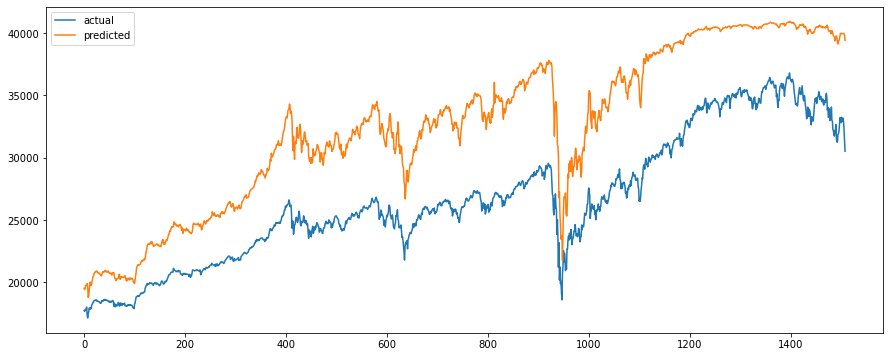

The Mean Absolute Error is: 0.17042605161398922


In [1003]:
plt.figure(figsize=(15,6))
plt.plot(y_actual, label = "actual")
plt.plot(mi_pred, label = "predicted")
plt.legend()
plt.show()
print('The Mean Absolute Error is: {}'.format(MAE))

In [1021]:
mi_pred

array([[19512.133],
       [19414.932],
       [19486.07 ],
       ...,
       [39956.656],
       [39833.72 ],
       [39425.71 ]], dtype=float32)

In [1033]:
len(dataset.iloc[test_len:,:])

1509

In [1035]:
len(mi_pred)

1509

In [1036]:
dataset.loc[test_len:,'MI_Close(t+1)'] = mi_pred

C:\Users\rich\anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
C:\Users\rich\anaconda3\lib\site-packages\pandas\core\indexing.py:1678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value


#### No feature Selection

In [1041]:
dj1

,Open,High,Low,Close,Volume,Close_1
Date,,,,,,
2002-06-13,9612.87,9625.40,9491.86,9502.80,227552955,9474.21
2002-06-14,9498.92,9498.92,9260.99,9474.21,287001167,9687.42
2002-06-17,9476.50,9687.77,9476.50,9687.42,247554505,9706.12
2002-06-18,9684.52,9721.75,9636.96,9706.12,212707042,9561.57
2002-06-19,9702.00,9733.39,9542.74,9561.57,248083566,9431.77
...,...,...,...,...,...,...
2022-06-07,32783.03,33207.45,32641.85,33180.14,327463783,32910.90
2022-06-08,33087.07,33156.50,32824.37,32910.90,314420559,32272.79
2022-06-09,32828.62,32956.73,32267.78,32272.79,331546530,31392.79


In [1043]:
X_no_feature = dj1[['High','Low','Open','Volume']].iloc[:-1,:]
Y_no_feature = pd.DataFrame((dj1['Close_1'])[:-1])
test_index = int(len(dataset)*0.7)

In [1044]:
scaled_X = x_sc.fit_transform(X_no_feature)
scaled_Y = y_sc.fit_transform(pd.DataFrame(Y_no_feature))

In [1045]:
X_original = np.reshape(scaled_X, (scaled_X.shape[0], scaled_X.shape[1], 1))
Y_original = scaled_Y.reshape((-1,1))

In [1046]:
train_x_original = X_original[:test_index]
train_y_original = Y_original[:test_index]
test_x_original = X_original[test_index:]
test_y_original = Y_original[test_index:]

In [1047]:
lstm = Sequential()
lstm.add(LSTM(50,return_sequences = True))
# 添加 Dropout 隐藏层 防止过拟合
lstm.add(Dropout(0.2))

# 添加 含有 30 个单元的 LSTM 网络(第二层)
lstm.add(LSTM(30,return_sequences = True))
# 添加 Dropout 隐藏层 防止过拟合
lstm.add(Dropout(0.2))

# 添加 含有 10 个单元的 LSTM 网络(第三层)
# 注意，最后一层没有 return_sequences = True ！！！
lstm.add(LSTM(10))
# 添加 Dropout 隐藏层 防|止过拟合
lstm.add(Dropout(0.2))

# 添加输出层网络以输出预测的股票收盘价格
lstm.add(Dense(1))

lstm.compile(optimizer='adam', loss='mean_squared_error')

In [1048]:
lstm.fit(train_x_original, train_y_original, batch_size=32, epochs=100)

Epoch 1/100
111/111 [==============================] - 8s 7ms/step - loss: 0.0078
Epoch 2/100
111/111 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 3/100
111/111 [==============================] - 1s 8ms/step - loss: 9.9750e-04
Epoch 4/100
111/111 [==============================] - 1s 7ms/step - loss: 8.1750e-04
Epoch 5/100
111/111 [==============================] - 1s 9ms/step - loss: 7.4102e-04
Epoch 6/100
111/111 [==============================] - 1s 7ms/step - loss: 6.3937e-04
Epoch 7/100
111/111 [==============================] - 1s 7ms/step - loss: 5.7969e-04
Epoch 8/100
111/111 [==============================] - 1s 7ms/step - loss: 5.0963e-04
Epoch 9/100
111/111 [==============================] - 1s 7ms/step - loss: 4.6990e-04
Epoch 10/100
111/111 [==============================] - 1s 7ms/step - loss: 3.9983e-04
Epoch 11/100
111/111 [==============================] - 1s 7ms/step - loss: 3.9282e-04
Epoch 12/100
111/111 [==============================] - 1s 7

In [1072]:
y_pred = y_sc.inverse_transform(lstm.predict(test_x_original))

In [1073]:
r2_score(test_y_original,lstm.predict(test_x_original))

-2.6803056940928798

In [1074]:
MAE_lstm = mean_absolute_error(test_y_original, lstm.predict(test_x_original))

In [1075]:
MAE_lstm

0.26242179610782335

In [1076]:
dj1_no = dj1.iloc[test_index :-1,:].copy()
dj1_no['Close(t+1)'] = y_pred
dj1_no

,Open,High,Low,Close,Volume,Close_1,Close(t+1)
Date,,,,,,,
2016-06-08,17931.91,18016.00,17931.91,18005.05,71269426,17985.19,17506.113281
2016-06-09,17969.98,18005.22,17915.88,17985.19,69697361,17865.34,17501.640625
2016-06-10,17938.82,17938.82,17812.34,17865.34,90531118,17732.48,17456.113281
2016-06-13,17830.50,17893.28,17731.35,17732.48,101606847,17674.82,17410.060547
2016-06-14,17710.77,17733.92,17595.79,17674.82,93730659,17640.17,17291.871094
...,...,...,...,...,...,...,...
2022-06-06,33032.04,33235.37,32819.50,32915.78,289294618,33180.14,17477.613281
2022-06-07,32783.03,33207.45,32641.85,33180.14,327463783,32910.90,17495.753906
2022-06-08,33087.07,33156.50,32824.37,32910.90,314420559,32272.79,17472.976562


In [1077]:
dataset

,High(t),Low(t),Open(t),Volume(t-5),Volume(t),Close(t+1),Close(t),MI_Close(t+1)
Date,,,,,,,,
2002-06-20,9573.89,9425.88,9561.64,227552955.0,276960842,9253.790000,9431.77,NaN
2002-06-21,9430.66,9220.63,9430.66,287001167.0,416432368,9281.820000,9253.79,NaN
2002-06-24,9369.95,9083.56,9252.47,247554505.0,341228701,9126.820000,9281.82,NaN
2002-06-25,9413.08,9111.25,9285.56,212707042.0,295015367,9120.110000,9126.82,NaN
2002-06-26,9160.81,8926.57,9108.22,248083566.0,407442095,9269.920000,9120.11,NaN
...,...,...,...,...,...,...,...,...
2022-06-06,33235.37,32819.50,33032.04,369091013.0,289294618,39974.734375,32915.78,39974.734375
2022-06-07,33207.45,32641.85,32783.03,640857432.0,327463783,39968.035156,33180.14,39968.035156
2022-06-08,33156.50,32824.37,33087.07,344779544.0,314420559,39956.656250,32910.90,39956.656250


In [1058]:
dj1_no

,Open,High,Low,Close,Volume,Close_1,Close(t+1)
Date,,,,,,,
2016-06-08,17931.91,18016.00,17931.91,18005.05,71269426,17985.19,19940.994141
2016-06-09,17969.98,18005.22,17915.88,17985.19,69697361,17865.34,19928.587891
2016-06-10,17938.82,17938.82,17812.34,17865.34,90531118,17732.48,19822.619141
2016-06-13,17830.50,17893.28,17731.35,17732.48,101606847,17674.82,19728.750000
2016-06-14,17710.77,17733.92,17595.79,17674.82,93730659,17640.17,19481.400391
...,...,...,...,...,...,...,...
2022-06-06,33032.04,33235.37,32819.50,32915.78,289294618,33180.14,39965.910156
2022-06-07,32783.03,33207.45,32641.85,33180.14,327463783,32910.90,39933.972656
2022-06-08,33087.07,33156.50,32824.37,32910.90,314420559,32272.79,39953.257812


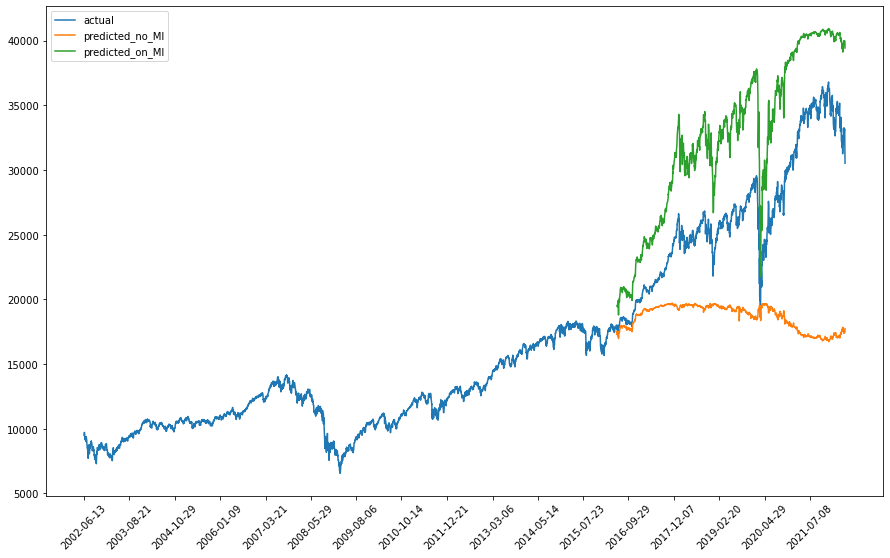

predicted_on_MI:  0.17042605161398922
predicted_no_MI: 0.26242179610782335


In [1124]:
plt.figure(figsize=(15,9))
plt.plot(dj1['Close'].shift(-1), label = "actual")
plt.plot(dj1_no['Close(t+1)'], label = "predicted_no_MI")
plt.plot(dataset['MI_Close(t+1)'][test_len:],label = "predicted_on_MI")
plt.xticks(dj1.index[::300],rotation=45)
plt.legend()
plt.show()
print("predicted_on_MI: ",MAE)
print("predicted_no_MI:",MAE_lstm)

### Change dataset

In [ ]:
def max_mi_of_features(DF,lags,Y):
    columns = DF.columns
    for i in columns:
        df = pd.DataFrame(DF[i])
        mi_scores = []
        for j in range(0,lags+1):
            df[i+'_lag_'+str(j)] = df.shift(i)
            mi_scores.append(MIR(df[i+'_lag_'+str(j)].dropna(),Y))
        new_featues[str(i)+'_lag_'+mi_scores.index(max(mi_scores))] = max(mi_scores)
    new features ={}
    return 

In [326]:
import scipy.spatial as ss
import scipy.stats as sst
from scipy.special import digamma,gamma
from sklearn.neighbors import KernelDensity
from math import log,pi,exp
import numpy.random as nr
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from cvxopt import matrix,solvers

In [354]:
def kraskov_mi(x,y,k):
    '''
        Estimate the mutual information I(X;Y) of X and Y from samples {x_i, y_i}_{i=1}^N
        Using KSG mutual information estimator
        Input: x: 2D list of size N*d_x
        y: 2D list of size N*d_y
        k: k-nearest neighbor parameter
        Output: one number of I(X;Y)
    '''

    assert len(x)==len(y), "Lists should have same length"
    assert k <= len(x)-1, "Set k smaller than num. samples - 1"
    N = len(x)
    dx = 1  
    dy = 1
    data = np.concatenate((x,y),axis=1)
 
    tree_xy = ss.cKDTree(data)
    tree_x = ss.cKDTree(x)
    tree_y = ss.cKDTree(y)

    knn_dis = [tree_xy.query(point,k+1,p=float('inf'))[0][k] for point in data]
    ans_xy = -digamma(k) + digamma(N) + (dx+dy)*log(2)#2*log(N-1) - digamma(N) #+ vd(dx) + vd(dy) - vd(dx+dy)
    ans_x = digamma(N) + dx*log(2)
    ans_y = digamma(N) + dy*log(2)
    
    for i in range(N):
        ans_xy += (dx+dy)*log(knn_dis[i])/N
        ans_x += -digamma(len(tree_x.query_ball_point(x[i],knn_dis[i]-1e-15,p=float('inf'))))/N+dx*log(knn_dis[i])/N
        ans_y += -digamma(len(tree_y.query_ball_point(y[i],knn_dis[i]-1e-15,p=float('inf'))))/N+dy*log(knn_dis[i])/N
    
    return ans_x+ans_y-ans_xy

In [ ]:
digamma(k)-(n-1)(1.0/k - digamma(k))